<a href="https://colab.research.google.com/github/amannitjsr/Machine-Learning/blob/main/Web_scrapping_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import openpyxl
from bs4 import BeautifulSoup
from google.colab import files
import pandas as pd
import numpy as np

# Open the HTML file
with open('/content/drive/MyDrive/machine learning/Amazon2.html', 'r') as file:
    content = file.read()

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(content, 'html.parser')

# Find all div elements with class="sg-col-inner"
divs = soup.find_all('div', class_='sg-col-inner')

# Initialize lists to store the data
names = []
reviews = []
prices = []

# Iterate over the div elements
for div in divs:
    # Find span with class="a-size-medium a-color-base a-text-normal"
    name_span = div.find('span', class_='a-size-medium a-color-base a-text-normal')
    if name_span:
        names.append(name_span.text)
    else:
        names.append("")

    # Find span with class="a-size-base s-underline-text"
    review_span = div.find('span', class_='a-size-base s-underline-text')
    if review_span:
        reviews.append(review_span.text)
    else:
        reviews.append("")

    # Find span with class="a-price-whole"
    price_span = div.find('span', class_='a-price-whole')
    if price_span:
        prices.append(price_span.text)
    else:
        prices.append("")

# Create an Excel workbook and select the active sheet
workbook = openpyxl.Workbook()
sheet = workbook.active

# Write the data to the Excel sheet
sheet.cell(row=1, column=1, value="Names")
sheet.cell(row=1, column=2, value="Reviews")
sheet.cell(row=1, column=3, value="Prices")

for i in range(len(names)):
    sheet.cell(row=i+2, column=1, value=names[i])
    sheet.cell(row=i+2, column=2, value=reviews[i])
    sheet.cell(row=i+2, column=3, value=prices[i])

# Save the workbook
workbook.save('amazon_data.xlsx')
    

# Download the file from Colab
#files.download('amazon_data.xlsx')


In [85]:
#converting it to dataframe:
df = pd.DataFrame({"Product_Name":names , 'Product_Price':prices,'Product_Rating_Count':reviews})

In [86]:
df.head()

,Product_Name,Product_Price,Product_Rating_Count
0,,,
1,,,
2,Apple iPhone 13 (128GB) - (Product) RED,"68,999.","15,380"
3,Apple iPhone 13 (128GB) - (Product) RED,"59,990","15,380"
4,,,


In [87]:
#droping null values
df.dropna(axis=0,inplace=True)

In [88]:
#creating index
df_new = df[df['Product_Name']!=''].reset_index()
df_new.drop('index',axis=1,inplace=True)

In [89]:
# printing new df
df_new.head()

,Product_Name,Product_Price,Product_Rating_Count
0,Apple iPhone 13 (128GB) - (Product) RED,"68,999.","15,380"
1,Apple iPhone 13 (128GB) - (Product) RED,"59,990","15,380"
2,Apple iPhone 13 (128GB) - (Product) RED,"59,990","15,380"
3,Apple iPhone 14 (128 GB) - Midnight,"68,999",934
4,Apple iPhone 14 (128 GB) - Midnight,"68,999",934


In [90]:
#to remove extra spaces from data frame
df_new = df_new.apply(lambda x: x.str.strip())

In [92]:
#giving info below of table:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Product_Name          37 non-null     object
 1   Product_Price         37 non-null     object
 2   Product_Rating_Count  37 non-null     object
dtypes: object(3)
memory usage: 1016.0+ bytes


In [93]:
df_new.shape

(37, 3)

In [111]:
df_new.head(38)

,Product_Name,Product_Price,Product_Rating_Count
0,Apple iPhone 13 (128GB) - (Product) RED,68999.0,15380
1,Apple iPhone 13 (128GB) - (Product) RED,59990.0,15380
2,Apple iPhone 13 (128GB) - (Product) RED,59990.0,15380
3,Apple iPhone 14 (128 GB) - Midnight,68999.0,934
4,Apple iPhone 14 (128 GB) - Midnight,68999.0,934
5,Apple iPhone 14 Plus (128 GB) - Yellow,76999.0,550
6,Apple iPhone 14 Plus (128 GB) - Yellow,76999.0,550
7,Apple iPhone 12 (64GB) - Purple,56900.0,31025
8,Apple iPhone 12 (64GB) - Purple,56900.0,31025
9,Apple iPhone 14 Plus (128 GB) - Starlight,76999.0,550


In [95]:
#replacing , or . from the dataset and to convert it to float
df_new['Product_Price'] = df_new['Product_Price'].str.replace(',','').str.replace('.','')
df_new['Product_Rating_Count'] = df_new['Product_Rating_Count'].str.replace(',','').str.replace('.','')

<ipython-input-95-aad455f734da>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new['Product_Price'] = df_new['Product_Price'].str.replace(',','').str.replace('.','')
<ipython-input-95-aad455f734da>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new['Product_Rating_Count'] = df_new['Product_Rating_Count'].str.replace(',','').str.replace('.','')


In [110]:
df_new['Product_Rating_Count'].iloc[29:] = df_new['Product_Rating_Count'].iloc[29:].str.replace('','0')

<ipython-input-110-e8bd04a8ccda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Product_Rating_Count'].iloc[29:] = df_new['Product_Rating_Count'].iloc[29:].str.replace('','0')


In [112]:
df_new['Product_Price'] = df_new['Product_Price'].astype(float)
df_new['Product_Rating_Count'] = df_new['Product_Rating_Count'].astype(float)

In [115]:
df_new.head()

,Product_Name,Product_Price,Product_Rating_Count
0,Apple iPhone 13 (128GB) - (Product) RED,68999.0,15380.0
1,Apple iPhone 13 (128GB) - (Product) RED,59990.0,15380.0
2,Apple iPhone 13 (128GB) - (Product) RED,59990.0,15380.0
3,Apple iPhone 14 (128 GB) - Midnight,68999.0,934.0
4,Apple iPhone 14 (128 GB) - Midnight,68999.0,934.0


In [124]:
#describing table 
df_new.describe()

,Product_Price,Product_Rating_Count
count,37.000000,37.000000
mean,68485.270270,8277.243243
std,37904.509112,12784.142596
min,10999.000000,0.000000
25%,56900.000000,481.000000
50%,68999.000000,550.000000
75%,79999.000000,15380.000000
max,149900.000000,31025.000000


<Axes: >

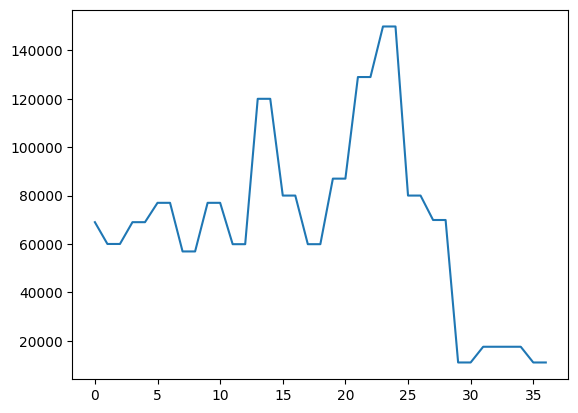

In [118]:
df_new['Product_Price'].plot(kind ='line')